# Project 1

## Step 1: Load the data and perform basic operations.

##### 1. Load the data in using pandas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

act_data = pd.read_csv("../data/act.csv", na_values=['NA'])
sat_data = pd.read_csv("../data/sat.csv", na_values=['NA'])

##### 2. Print the first ten rows of each dataframe.

In [2]:
act_data[1:10]

,Unnamed: 0,State,Participation,English,Math,Reading,Science,Composite
1,1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,5,California,31%,22.5,22.7,23.1,22.2,22.8
6,6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [3]:
sat_data[1:10]

,Unnamed: 0,State,Participation,Evidence-Based Reading and Writing,Math,Total
1,1,Alaska,38%,547,533,1080
2,2,Arizona,30%,563,553,1116
3,3,Arkansas,3%,614,594,1208
4,4,California,53%,531,524,1055
5,5,Colorado,11%,606,595,1201
6,6,Connecticut,100%,530,512,1041
7,7,Delaware,100%,503,492,996
8,8,District of Columbia,100%,482,468,950
9,9,Florida,83%,520,497,1017


##### 3. Describe in words what each variable (column) is.

Unnamed: Id assocaited to the row

State: Location of the data in the row

Participation: Percent of students that took the test and shared their results

Subjects: Average/Mean of students' scores for that subject

Total: Sum of all subjects

##### 4. Does the data look complete? Are there any obvious issues with the observations?

The first column of both files of data are missing a name. It's currently entitled "Unnamed: 0".

##### 5. Print the types of each column.

In [4]:
def print_type_of_columns(data):
    data_types = []
    data_columns = list(data)
    for x in range(len(data_columns)):
        data_types.append(type(data.values[1][x]))
    
    for x,y in zip(data_columns,data_types):
        print(str(x) + " column is of type: " + str(y))

In [5]:
print("ACT Data:")
print_type_of_columns(act_data)
print("\n")
print("SAT Data:")
print_type_of_columns(sat_data)

ACT Data:
Unnamed: 0 column is of type: <class 'int'>
State column is of type: <class 'str'>
Participation column is of type: <class 'str'>
English column is of type: <class 'float'>
Math column is of type: <class 'float'>
Reading column is of type: <class 'float'>
Science column is of type: <class 'float'>
Composite column is of type: <class 'float'>


SAT Data:
Unnamed: 0 column is of type: <class 'int'>
State column is of type: <class 'str'>
Participation column is of type: <class 'str'>
Evidence-Based Reading and Writing column is of type: <class 'int'>
Math column is of type: <class 'int'>
Total column is of type: <class 'int'>


##### 6. Do any types need to be reassigned? If so, go ahead and do it.

There are two things based on preference:
1. We can convert the Participation column into a float
2. We can match the Total column within the SAT data to the Total column within the ACT data by converting it to a float.
   
   The same can be done to all of the subject values within the SAT data

In [6]:
act_data["Participation"] = act_data["Participation"].str.rstrip("%").astype('float')
sat_data["Participation"] = sat_data["Participation"].str.rstrip("%").astype('float')

The first two issues have been addressed and fixed.

##### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

In [7]:
def each_val_per_state(data):
    state_dict = {}
    
    data_columns = list(data)
    state_loc = data_columns.index("State")+1
    
    for x in data_columns[state_loc:]:
        state_dict[x] = data.set_index("State").to_dict()[x]

    return state_dict

sat_dict = each_val_per_state(sat_data)
act_dict = each_val_per_state(act_data)

#print(act_dict)

##### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.

In [8]:
sat_data_list = sat_data.to_dict('list')
sat_data_series = sat_data.to_dict('series')
act_data_list = act_data.to_dict('list')
act_data_series = act_data.to_dict('series')

##### 9. Merge the dataframes on the state column.

In [9]:
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html
merged_dataframe = pd.merge(act_data,sat_data, on=["State"])

##### 10. Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.

In [10]:
merged_dataframe = pd.merge(act_data,sat_data, on=["State"], suffixes=('_act','_sat'))

##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [11]:
rearranged_columns = ['Unnamed: 0_act', 'Unnamed: 0_sat', 'State', 'Participation_act', 'English', 'Math_act', 'Reading', 'Science', 'Composite', 'Participation_sat', 'Evidence-Based Reading and Writing', 'Math_sat', 'Total']
merged_dataframe = merged_dataframe[rearranged_columns]

a = merged_dataframe.min()[3:]
b = merged_dataframe.max()[3:]
min_max_df = pd.concat([a,b], axis=0)
print(min_max_df)

Participation_act                        8
English                               16.3
Math_act                                18
Reading                               18.1
Science                                2.3
Composite                             17.8
Participation_sat                        2
Evidence-Based Reading and Writing     482
Math_sat                                52
Total                                  950
Participation_act                      100
English                               25.5
Math_act                              25.3
Reading                                 26
Science                               24.9
Composite                             25.5
Participation_sat                      100
Evidence-Based Reading and Writing     644
Math_sat                               651
Total                                 1295
dtype: object


##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [12]:
#print(merged_dataframe.mean())

In [13]:
#mean = [np.mean((lambda y : merged_dataframe[x] if isinstance(x,float) else np.nan) for x in rearranged_columns[3:]]

filler_columns_mean = [0,0,"Mean"] #not asked for, but useful to see
filler_columns_sd = [0,0,"Std"]

mean = [merged_dataframe[x].mean() for x in rearranged_columns[3:]]
sd = [merged_dataframe[x].std() for x in rearranged_columns[3:]]

mean = pd.Series(filler_columns_mean+mean, name="Mean", index=rearranged_columns)
sd = pd.Series(filler_columns_sd+sd, name="Sd", index=rearranged_columns)

#print(mean)
#print(mean, sd, len(mean), len(sd))

## Step 2: Manipulate the dataframe

##### 13. Turn the list `sd` into a new observation in your dataset.

In [14]:
merged_dataframe.loc["Mean"] = mean
merged_dataframe.loc["Std"] = sd

In [15]:
merged_dataframe

,Unnamed: 0_act,Unnamed: 0_sat,State,Participation_act,English,Math_act,Reading,Science,Composite,Participation_sat,Evidence-Based Reading and Writing,Math_sat,Total
0,1,0,Alabama,100.000000,18.900000,18.400000,19.700000,19.400000,19.200000,5.000000,593.000000,572.000000,1165.000000
1,2,1,Alaska,65.000000,18.700000,19.800000,20.400000,19.900000,19.800000,38.000000,547.000000,533.000000,1080.000000
2,3,2,Arizona,62.000000,18.600000,19.800000,20.100000,19.800000,19.700000,30.000000,563.000000,553.000000,1116.000000
3,4,3,Arkansas,100.000000,18.900000,19.000000,19.700000,19.500000,19.400000,3.000000,614.000000,594.000000,1208.000000
4,5,4,California,31.000000,22.500000,22.700000,23.100000,22.200000,22.800000,53.000000,531.000000,524.000000,1055.000000
5,6,5,Colorado,100.000000,20.100000,20.300000,21.200000,20.900000,20.800000,11.000000,606.000000,595.000000,1201.000000
6,7,6,Connecticut,31.000000,25.500000,24.600000,25.600000,24.600000,25.200000,100.000000,530.000000,512.000000,1041.000000
7,8,7,Delaware,18.000000,24.100000,23.400000,24.800000,23.600000,24.100000,100.000000,503.000000,492.000000,996.000000
8,9,8,District of Columbia,32.000000,24.400000,23.500000,24.900000,23.500000,24.200000,100.000000,482.000000,468.000000,950.000000
9,10,9,Florida,73.000000,19.000000,19.400000,21.000000,19.400000,19.800000,83.000000,520.000000,497.000000,1017.000000


##### 14. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

In [35]:
merged_dataframe.sort_values("Participation_sat").head(3)

,Unnamed: 0_act,Unnamed: 0_sat,State,Participation_act,English,Math_act,Reading,Science,Composite,Participation_sat,Evidence-Based Reading and Writing,Math_sat,Total
34,35,34,North Dakota,98.0,19.0,20.4,20.5,20.6,20.3,2.0,635.0,621.0,1256.0
15,16,15,Iowa,67.0,21.2,21.3,22.6,22.1,21.9,2.0,641.0,635.0,1275.0
24,25,24,Mississippi,100.0,18.2,18.1,18.8,18.8,18.6,2.0,634.0,607.0,1242.0


In [40]:
merged_dataframe.sort_values("Participation_sat").tail(3)

,Unnamed: 0_act,Unnamed: 0_sat,State,Participation_act,English,Math_act,Reading,Science,Composite,Participation_sat,Evidence-Based Reading and Writing,Math_sat,Total
7,8,7,Delaware,18.0,24.1,23.4,24.8,23.6,24.1,100.0,503.0,492.0,996.0
8,9,8,District of Columbia,32.0,24.4,23.5,24.9,23.5,24.2,100.0,482.0,468.0,950.0
22,23,22,Michigan,29.0,24.1,23.7,24.5,23.8,24.1,100.0,509.0,495.0,1005.0


In [41]:
merged_dataframe.sort_values("Participation_act").head()

,Unnamed: 0_act,Unnamed: 0_sat,State,Participation_act,English,Math_act,Reading,Science,Composite,Participation_sat,Evidence-Based Reading and Writing,Math_sat,Total
19,20,19,Maine,8.0,24.2,24.0,24.8,23.7,24.3,95.0,513.0,499.0,1012.0
29,30,29,New Hampshire,18.0,25.4,25.1,26.0,24.9,25.5,96.0,532.0,520.0,1052.0
7,8,7,Delaware,18.0,24.1,23.4,24.8,23.6,24.1,100.0,503.0,492.0,996.0
39,40,39,Rhode Island,21.0,24.0,23.3,24.7,23.4,24.0,71.0,539.0,524.0,1062.0
38,39,38,Pennsylvania,23.0,23.4,23.4,24.2,23.3,23.7,65.0,540.0,531.0,1071.0


In [43]:
merged_dataframe.sort_values("Participation_act").tail(3)

,Unnamed: 0_act,Unnamed: 0_sat,State,Participation_act,English,Math_act,Reading,Science,Composite,Participation_sat,Evidence-Based Reading and Writing,Math_sat,Total
3,4,3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614.0,594.0,1208.0
40,41,40,South Carolina,100.0,17.5,18.6,19.1,18.9,18.7,50.0,543.0,521.0,1064.0
26,27,26,Montana,100.0,19.0,20.2,21.0,20.5,20.3,10.0,605.0,591.0,1196.0


##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [42]:
merged_dataframe.query("Participation_sat > 50")

,Unnamed: 0_act,Unnamed: 0_sat,State,Participation_act,English,Math_act,Reading,Science,Composite,Participation_sat,Evidence-Based Reading and Writing,Math_sat,Total
4,5,4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531.0,524.0,1055.0
6,7,6,Connecticut,31.0,25.5,24.6,25.6,24.6,25.2,100.0,530.0,512.0,1041.0
7,8,7,Delaware,18.0,24.1,23.4,24.8,23.6,24.1,100.0,503.0,492.0,996.0
8,9,8,District of Columbia,32.0,24.4,23.5,24.9,23.5,24.2,100.0,482.0,468.0,950.0
9,10,9,Florida,73.0,19.0,19.4,21.0,19.4,19.8,83.0,520.0,497.0,1017.0
10,11,10,Georgia,55.0,21.0,20.9,22.0,21.3,21.4,61.0,535.0,515.0,1050.0
11,12,11,Hawaii,90.0,17.8,19.2,19.2,19.3,19.0,55.0,544.0,541.0,1085.0
12,13,12,Idaho,38.0,21.9,21.8,23.0,22.1,22.3,93.0,513.0,493.0,1005.0
14,15,14,Indiana,35.0,22.0,22.4,23.2,22.3,22.6,63.0,542.0,532.0,1074.0
19,20,19,Maine,8.0,24.2,24.0,24.8,23.7,24.3,95.0,513.0,499.0,1012.0


## Step 3: Visualize the data

##### 16. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find [this link](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.) 

In [18]:
def sns_dist_plot(data, title, color):
    f, ax = plt.subplots(1, 1, figsize=(10,5), sharey=True)
    ax.set_title(title, fontsize=20)
    sns.distplot(data[:51],
                 kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                 hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1, "color": color}, ax=ax)
    #plt.title(title)
    plt.figure()

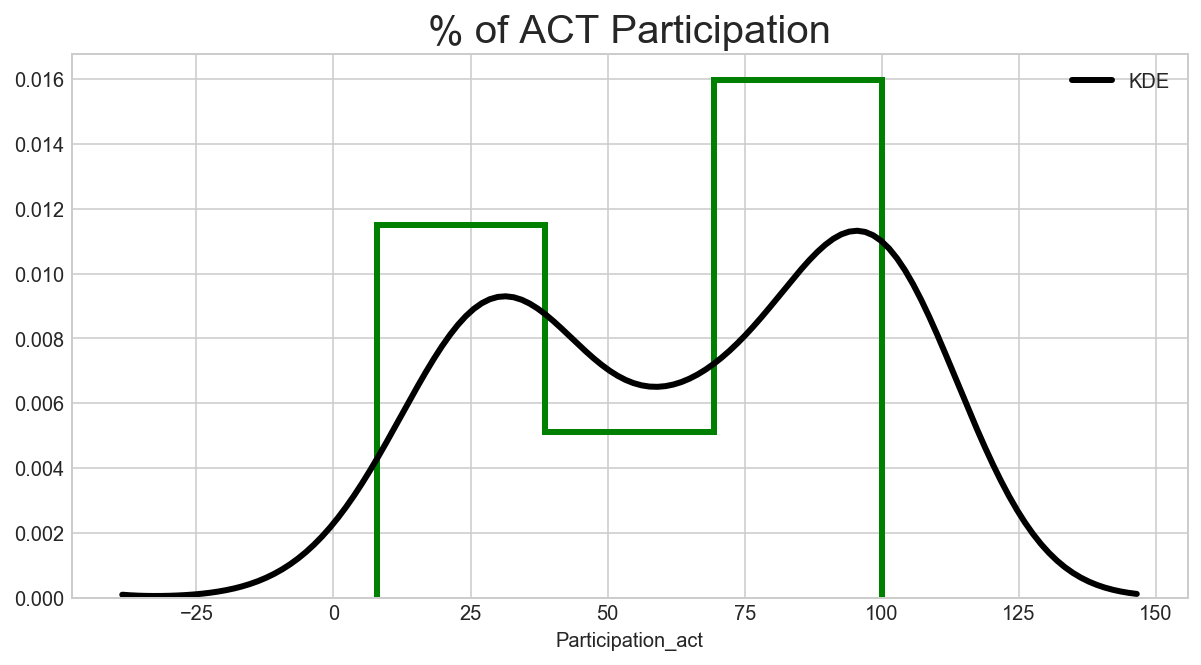

<Figure size 432x288 with 0 Axes>

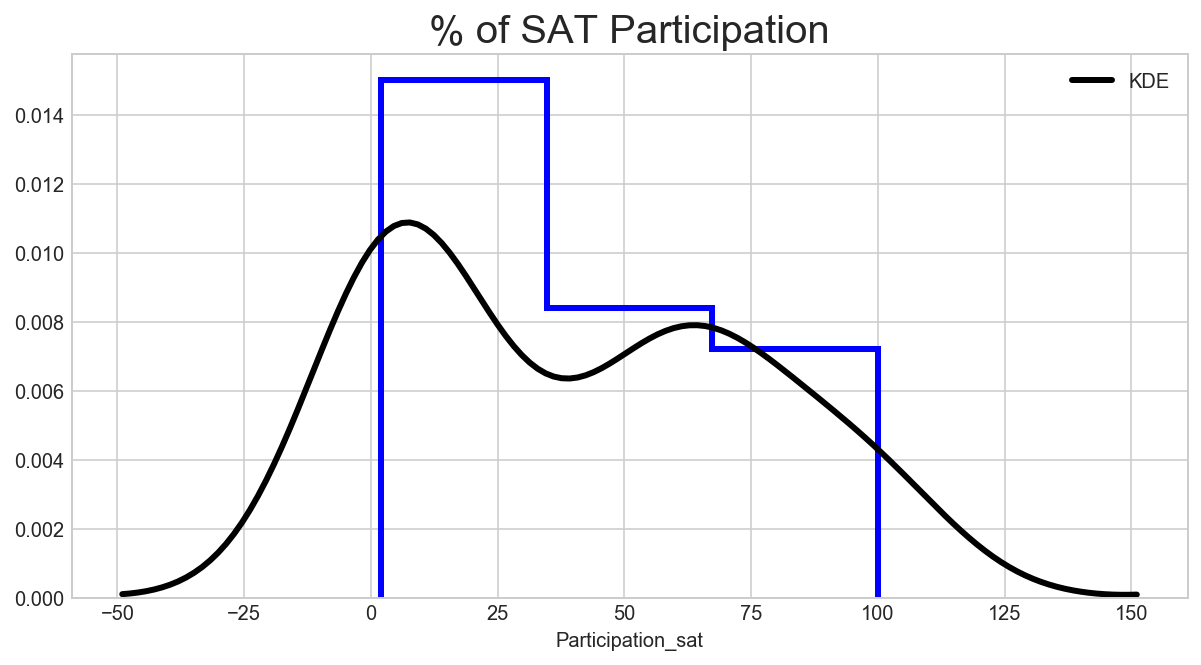

<Figure size 432x288 with 0 Axes>

In [19]:
sns_dist_plot(merged_dataframe["Participation_act"], "% of ACT Participation", "g")
sns_dist_plot(merged_dataframe["Participation_sat"], "% of SAT Participation", "b")

In [20]:
#f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), sharey=True)
# ax1.hist(merged_dataframe["Participation_act"], lw=5)
# ax1.set_title('% of ACT Participation', fontsize=20)
# ax2.hist(merged_dataframe["Participation_sat"], lw=5)
# ax2.set_title('% of SAT Participation', fontsize=20)
#plt.show()

##### 17. Plot the Math(s) distributions from both data sets.

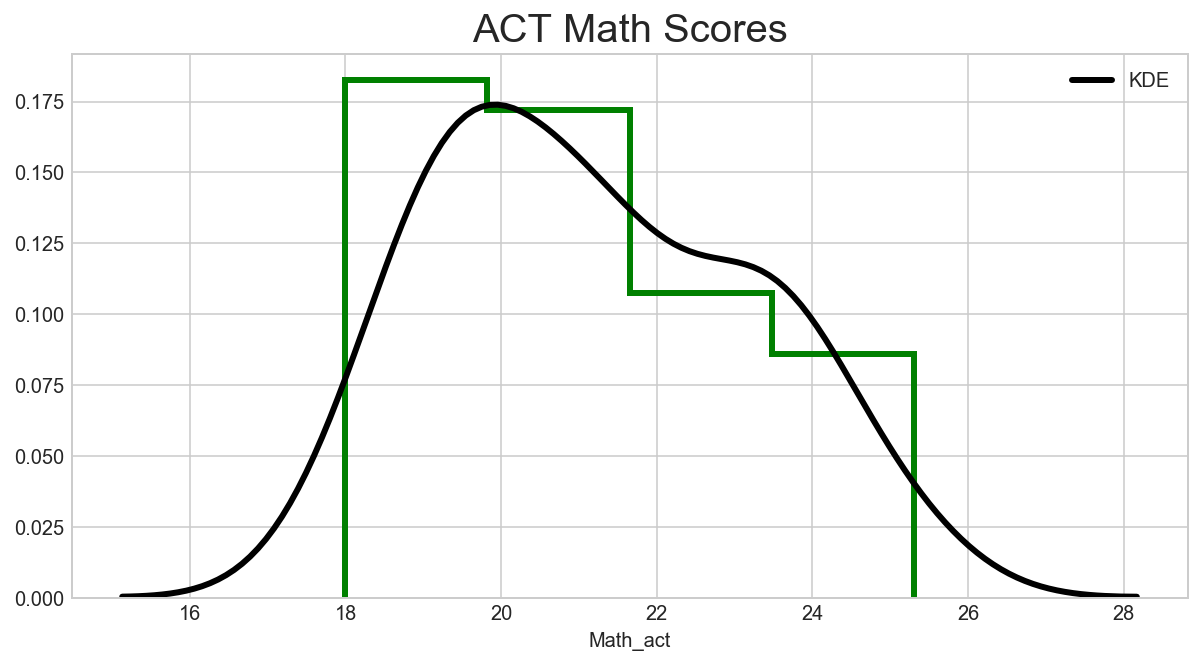

<Figure size 432x288 with 0 Axes>

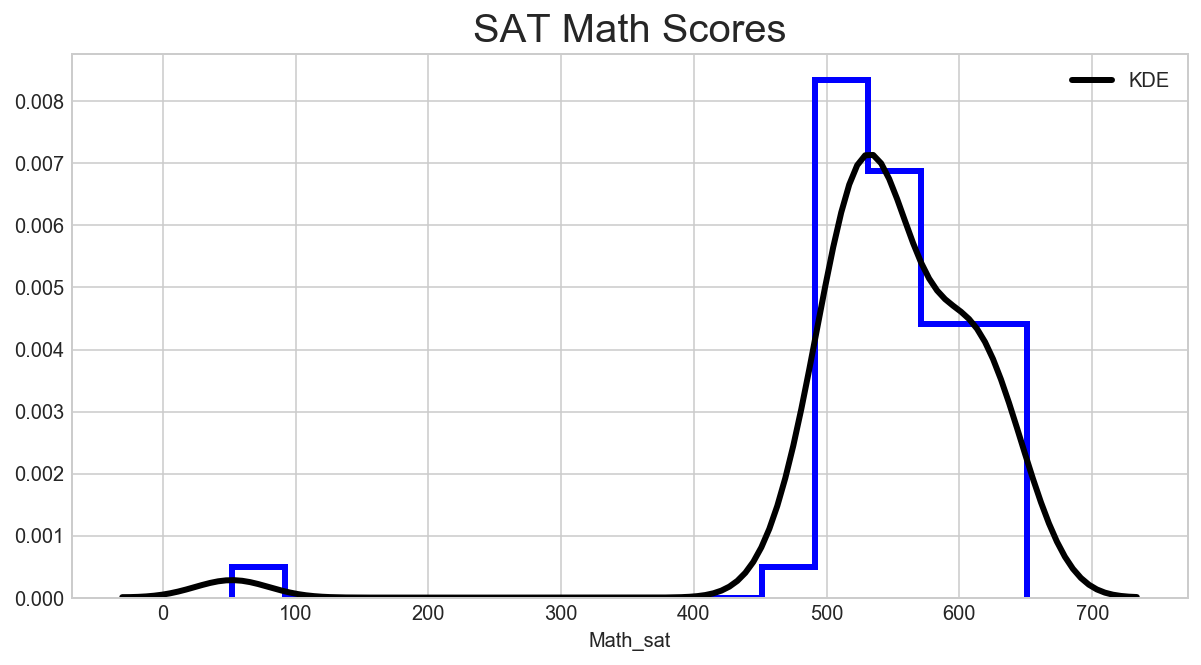

<Figure size 432x288 with 0 Axes>

In [21]:
sns_dist_plot(merged_dataframe["Math_act"], "ACT Math Scores", "g")
sns_dist_plot(merged_dataframe["Math_sat"], "SAT Math Scores", "b")

##### 18. Plot the Verbal distributions from both data sets.

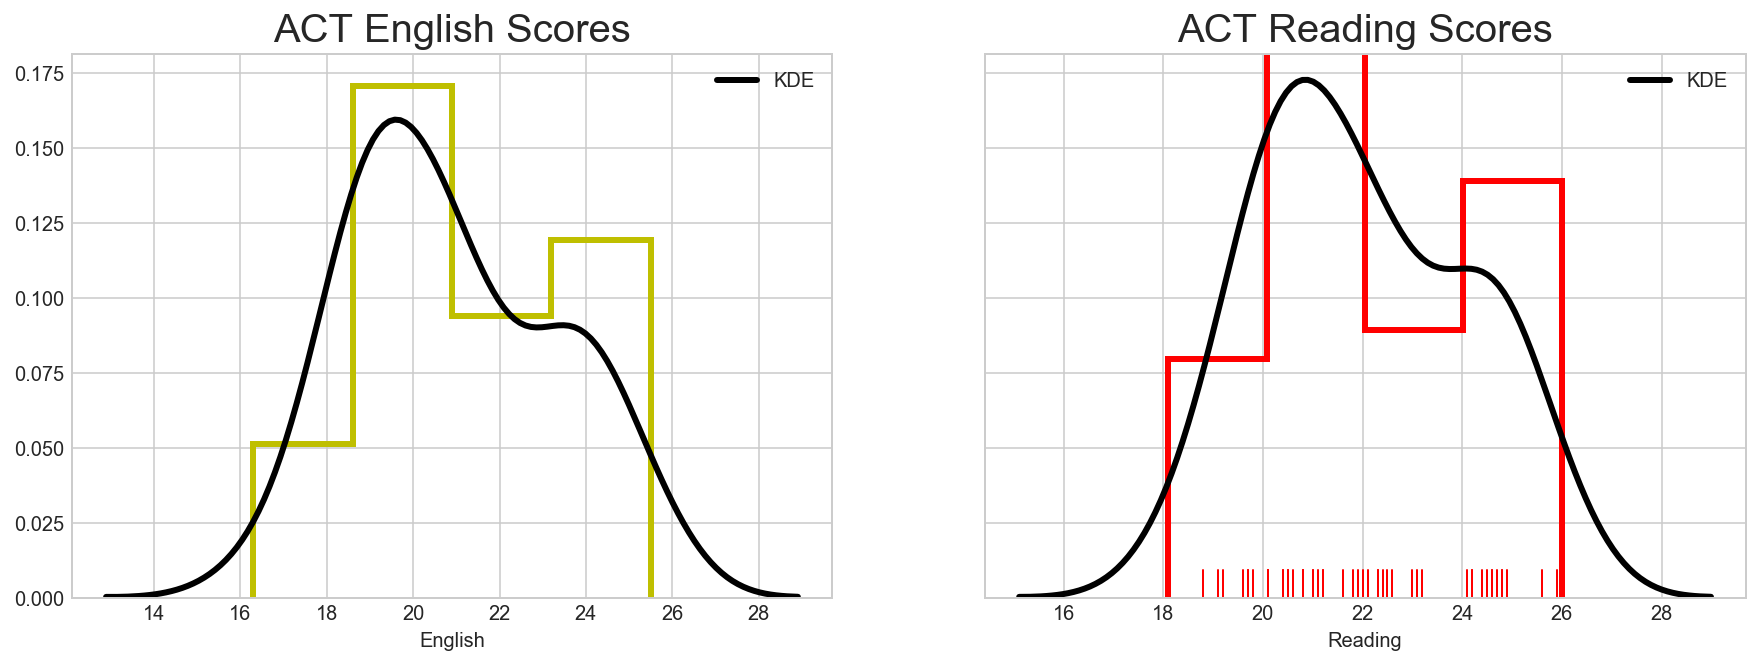

<Figure size 432x288 with 0 Axes>

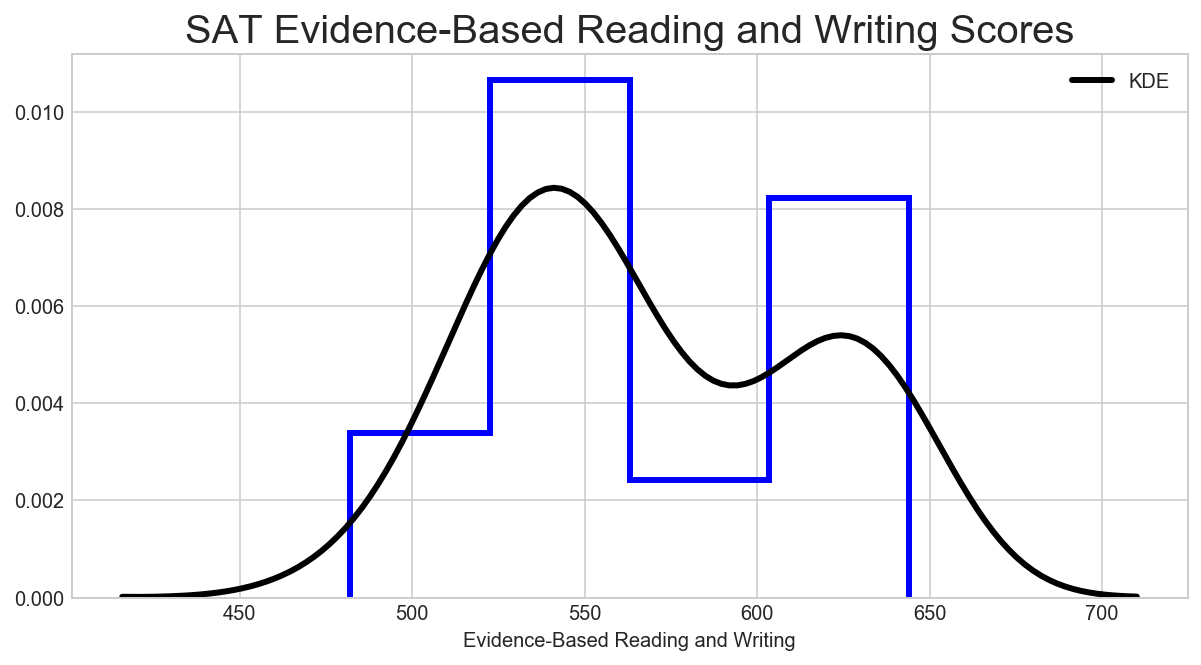

<Figure size 432x288 with 0 Axes>

In [22]:
#sns_plot(merged_dataframe["English"], "ACT English Scores", "g")

f, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,5), sharey=True)
ax1.set_title('ACT English Scores', fontsize=20)
sns.distplot(merged_dataframe["English"][:51],
             kde_kws={"color": "k", "lw": 3, "label": "KDE"},
             hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1, "color": "y"}, ax=ax1)
ax2.set_title('ACT Reading Scores', fontsize=20)
sns.distplot(merged_dataframe["Reading"][:51], rug=True, rug_kws={"color": "r"},
             kde_kws={"color": "k", "lw": 3, "label": "KDE"},
             hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1, "color": "r"}, ax=ax2)
plt.figure()

sns_dist_plot(merged_dataframe["Evidence-Based Reading and Writing"], "SAT Evidence-Based Reading and Writing Scores", "b")

##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

Normal

##### 20. Does this assumption hold true for any of our columns? Which?

Using the following code snippet, we can look at each individual column to assess if it's a normal distribution or not.

`for x in rearranged_columns[3:]:
    sns_dist_plot(merged_dataframe[x], x, "b")`
   
After looking at all of the histograms, none of them are normal distributions.

##### 21. Plot some scatterplots examining relationships between all variables.

In [23]:
def sns_reg_plot(dataX, dataY, title, color):
    f, ax = plt.subplots(1, 1, figsize=(10,5), sharey=True)
    ax.set_title(title, fontsize=20)
    sns.regplot(dataX[:51], dataY[:51], ax=ax)
    plt.figure()

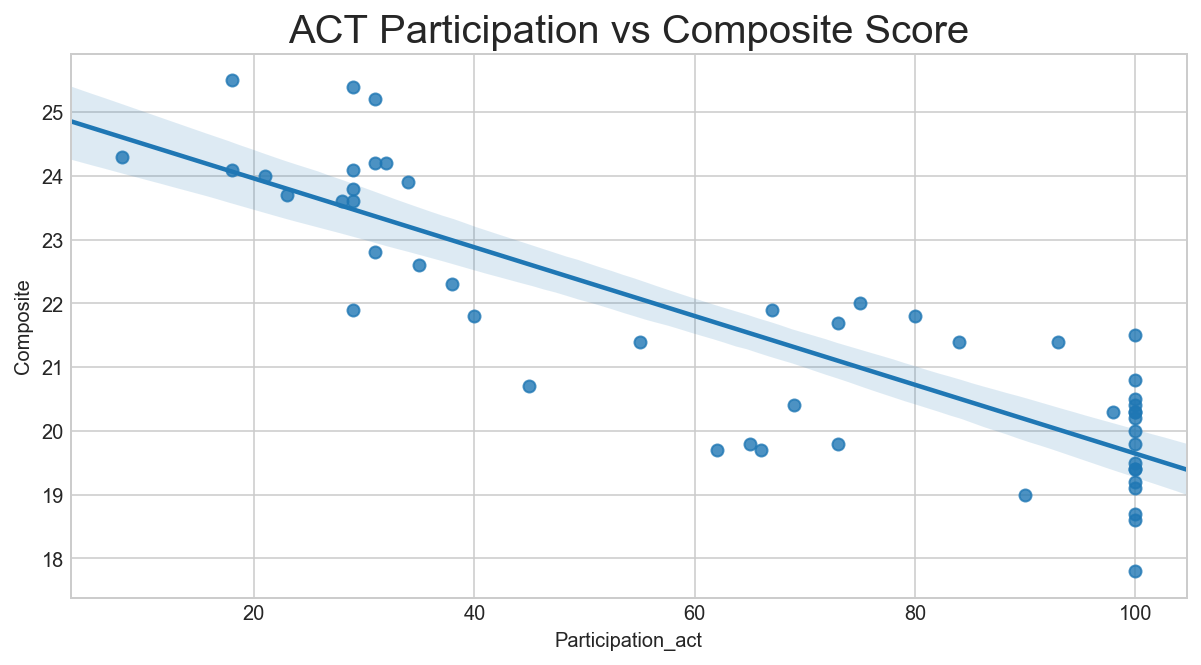

<Figure size 432x288 with 0 Axes>

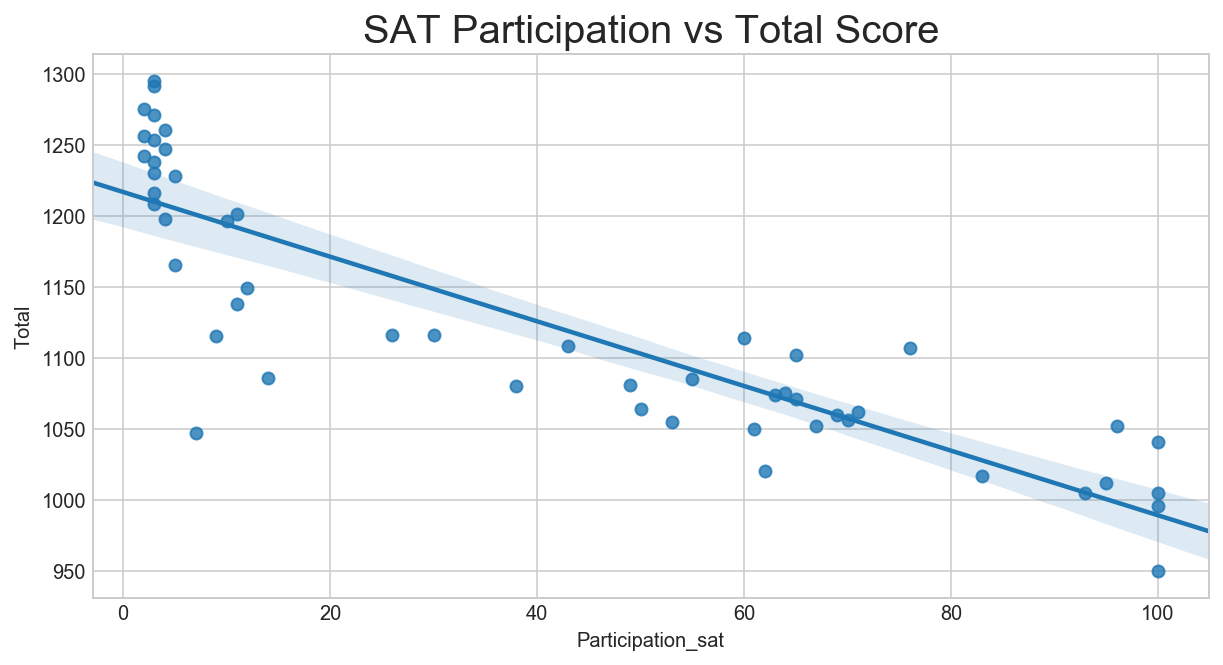

<Figure size 432x288 with 0 Axes>

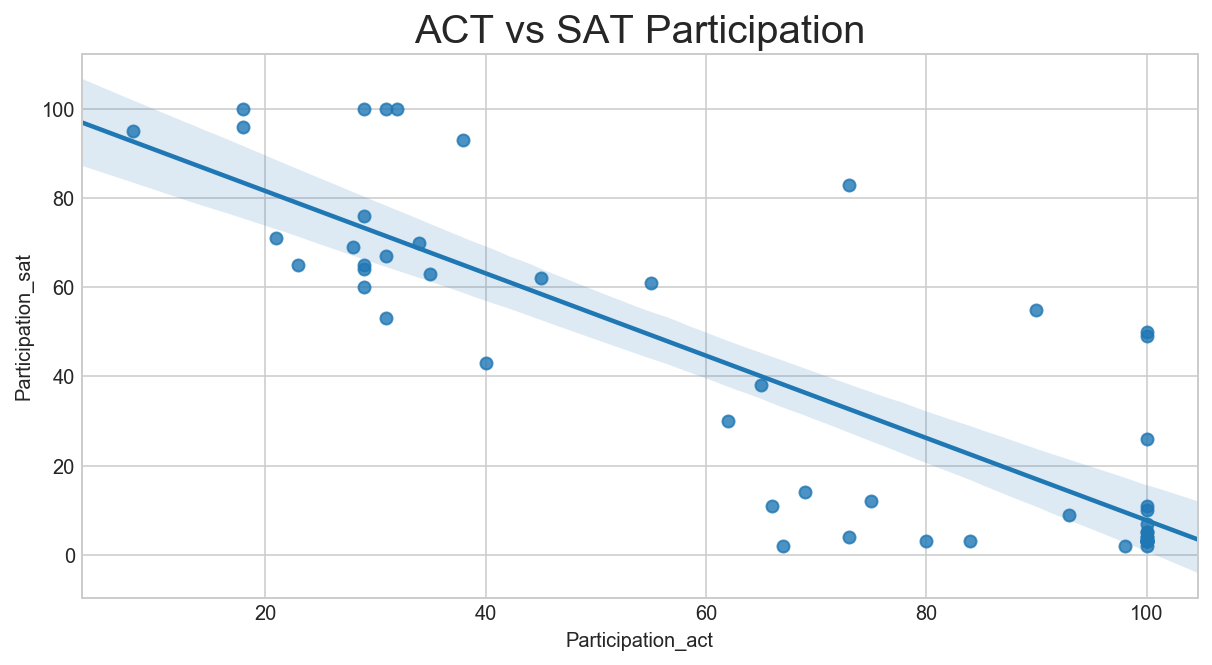

<Figure size 432x288 with 0 Axes>

In [24]:
sns_reg_plot(merged_dataframe["Participation_act"],merged_dataframe["Composite"],"ACT Participation vs Composite Score","b")
sns_reg_plot(merged_dataframe["Participation_sat"],merged_dataframe["Total"],"SAT Participation vs Total Score","b")
sns_reg_plot(merged_dataframe["Participation_act"],merged_dataframe["Participation_sat"],"ACT vs SAT Participation","b")

##### 22. Are there any interesting relationships to note?

The key things to note are the following:
- Test participation (ACT and SAT) is negatively correlated to total test score
- ACT participation is negatively correlated to SAT participation

Based on that, we'll later look into these states based on their interesting participation rates:
- Mississippi - ACT: 100%, SAT: 2%
- Delaware - ACT: 18%, SAT: 100%
- Maine - ACT: 8%, SAT: 95%
- Arkansas - ACT: 100%, SAT: 3%

##### 23. Create box plots for each variable. 

In [25]:
def sns_box_plot(dataX, dataY, title, color):
    f, ax = plt.subplots(1, 1, figsize=(20,13), sharey=True)
    ax.set_title(title, fontsize=20)
    sns.boxplot(dataX[:51], dataY[:51], ax=ax)
    plt.figure()

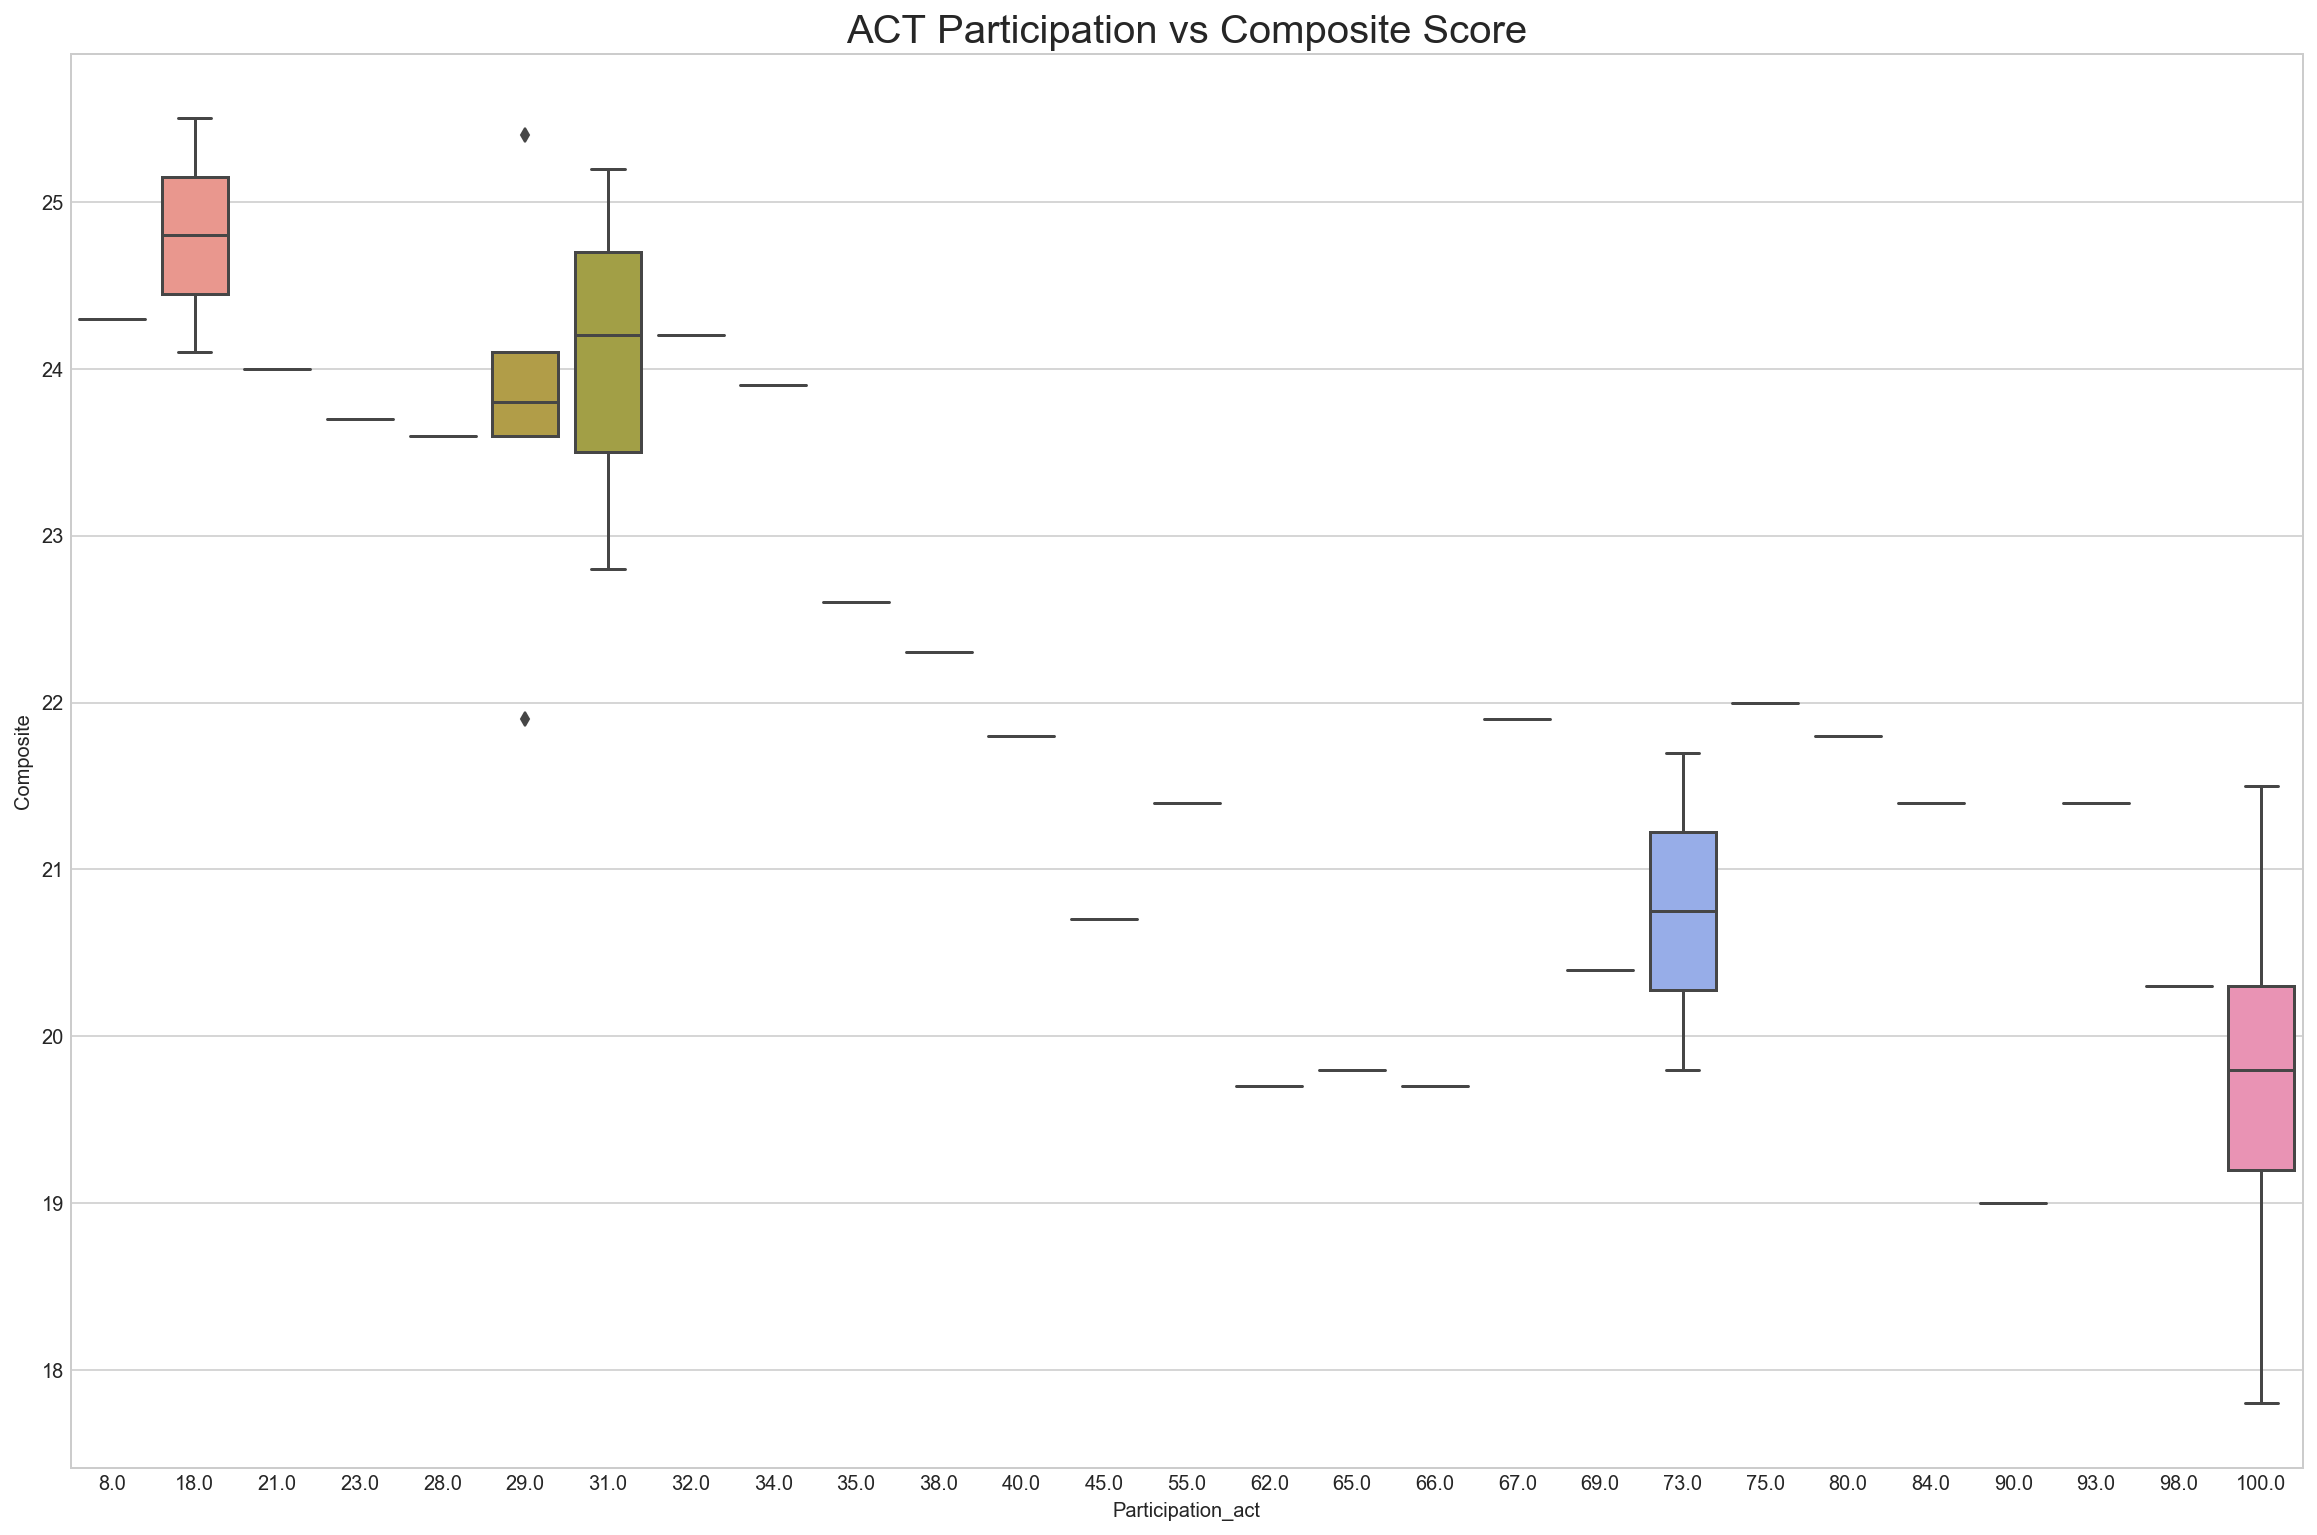

<Figure size 432x288 with 0 Axes>

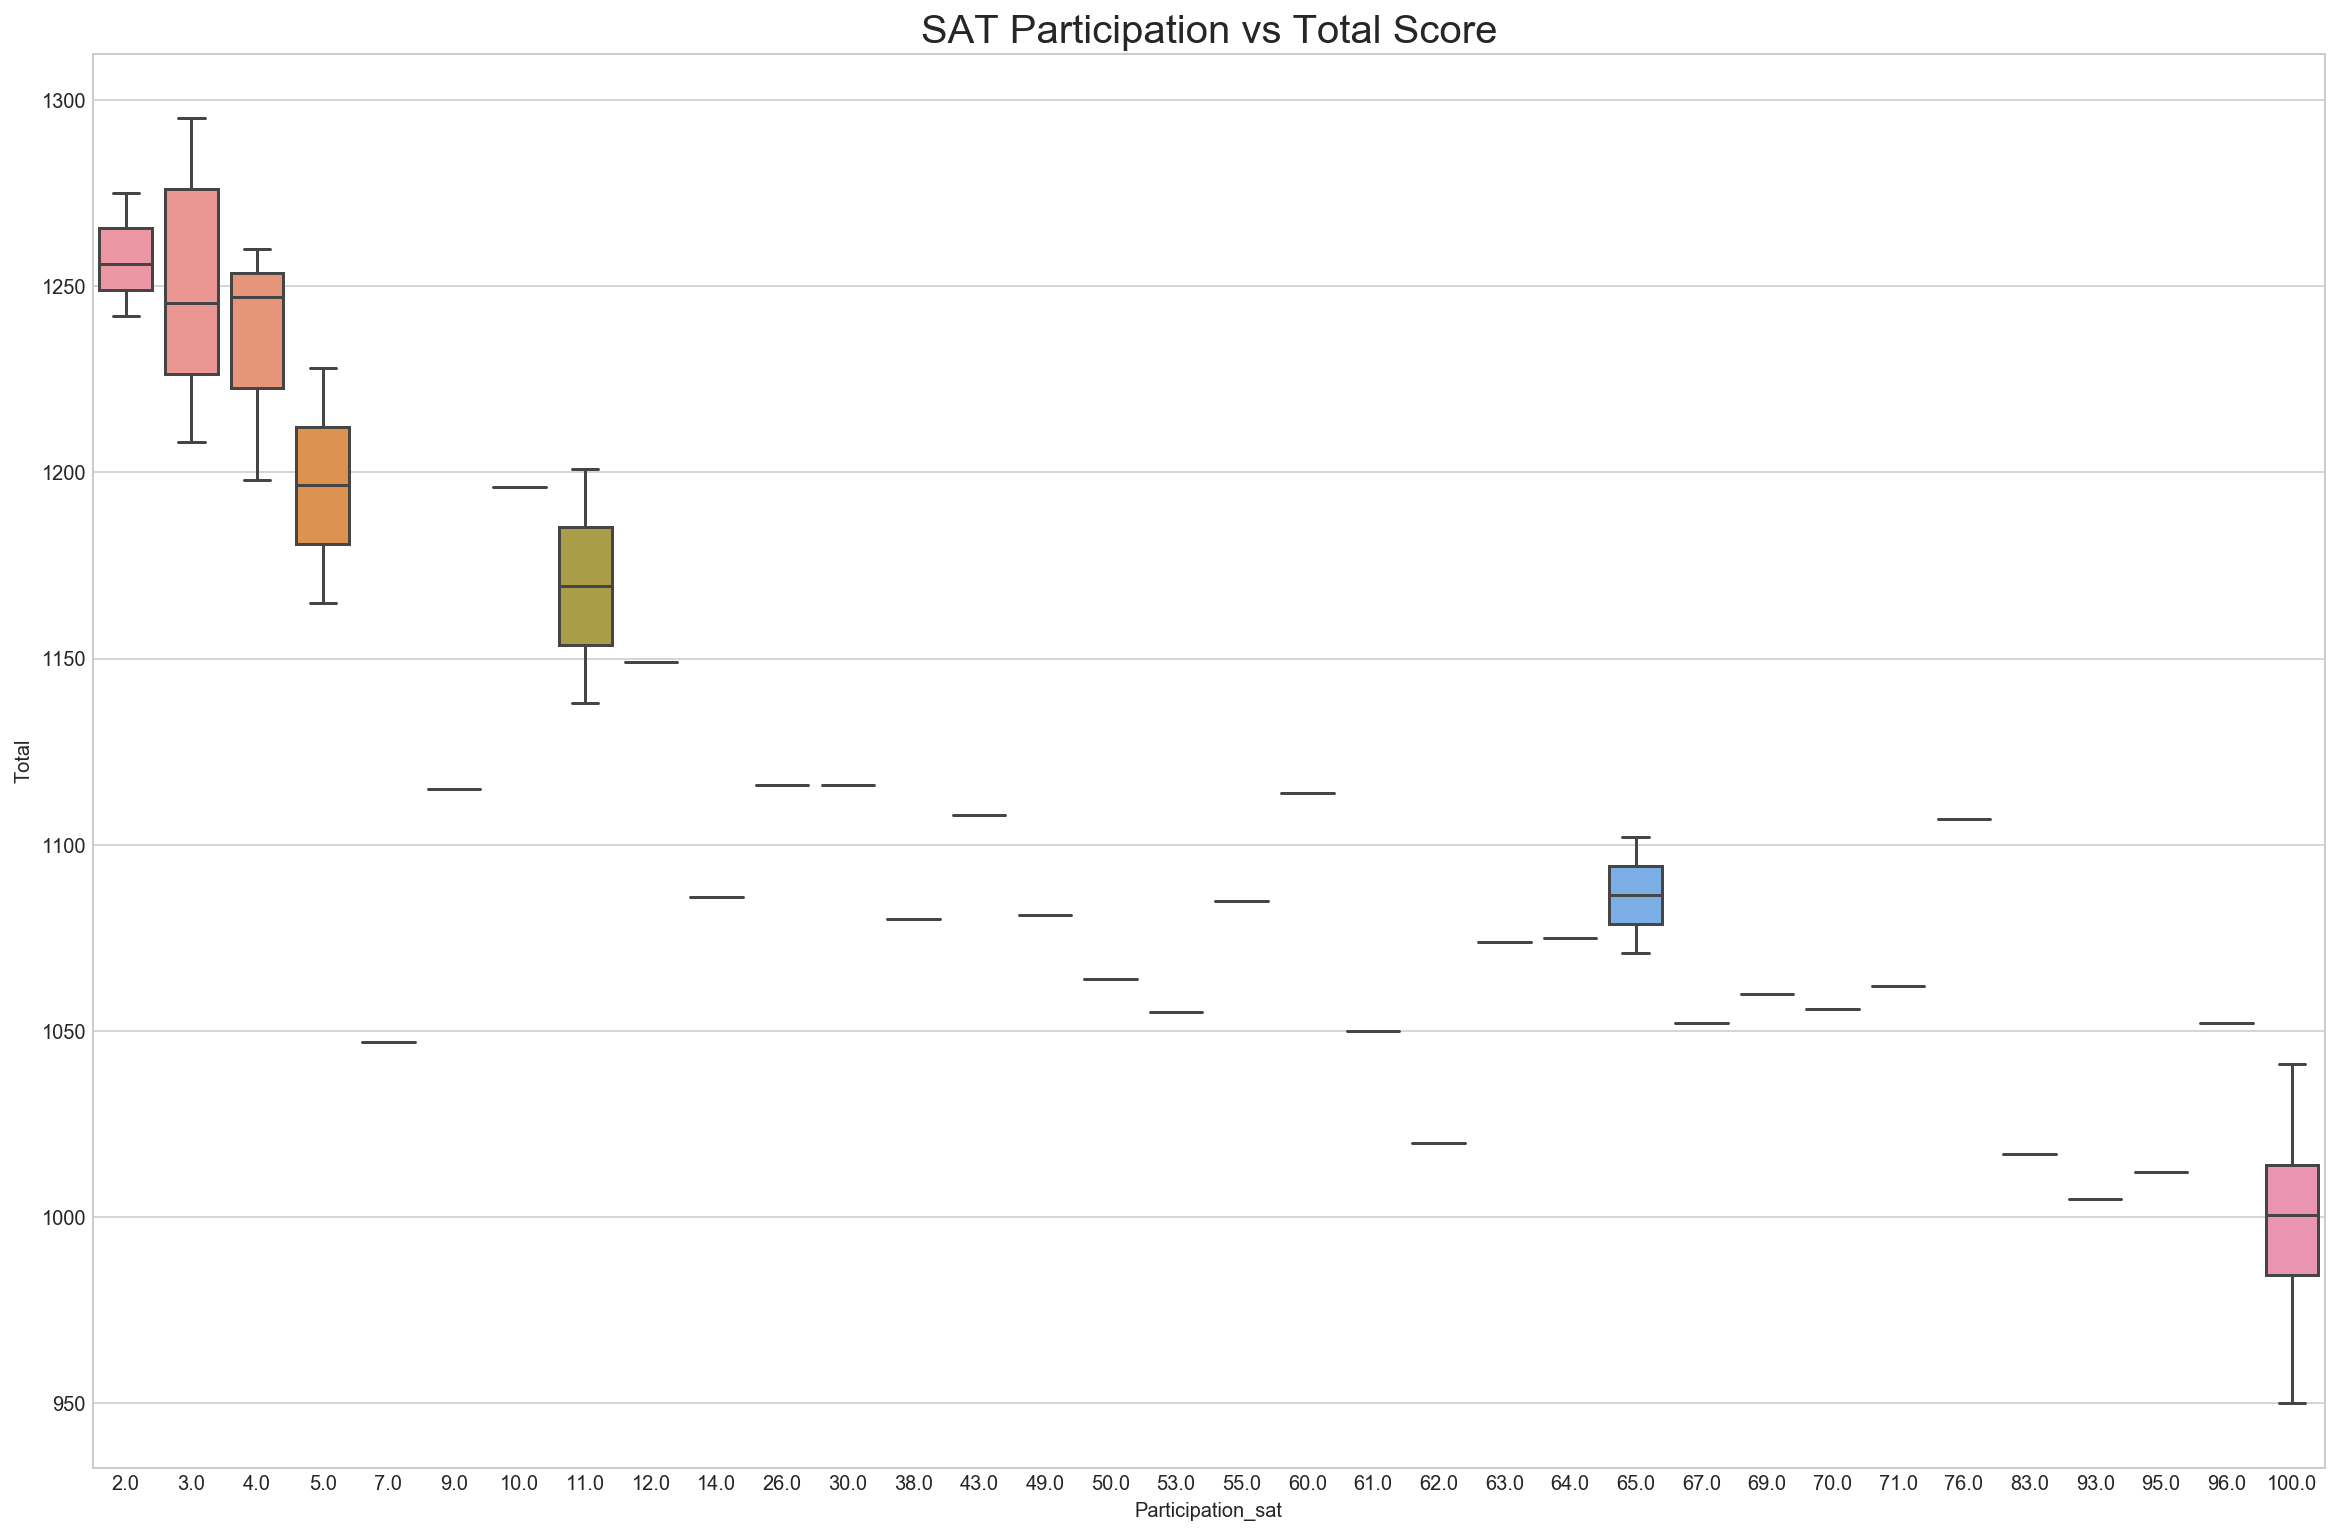

<Figure size 432x288 with 0 Axes>

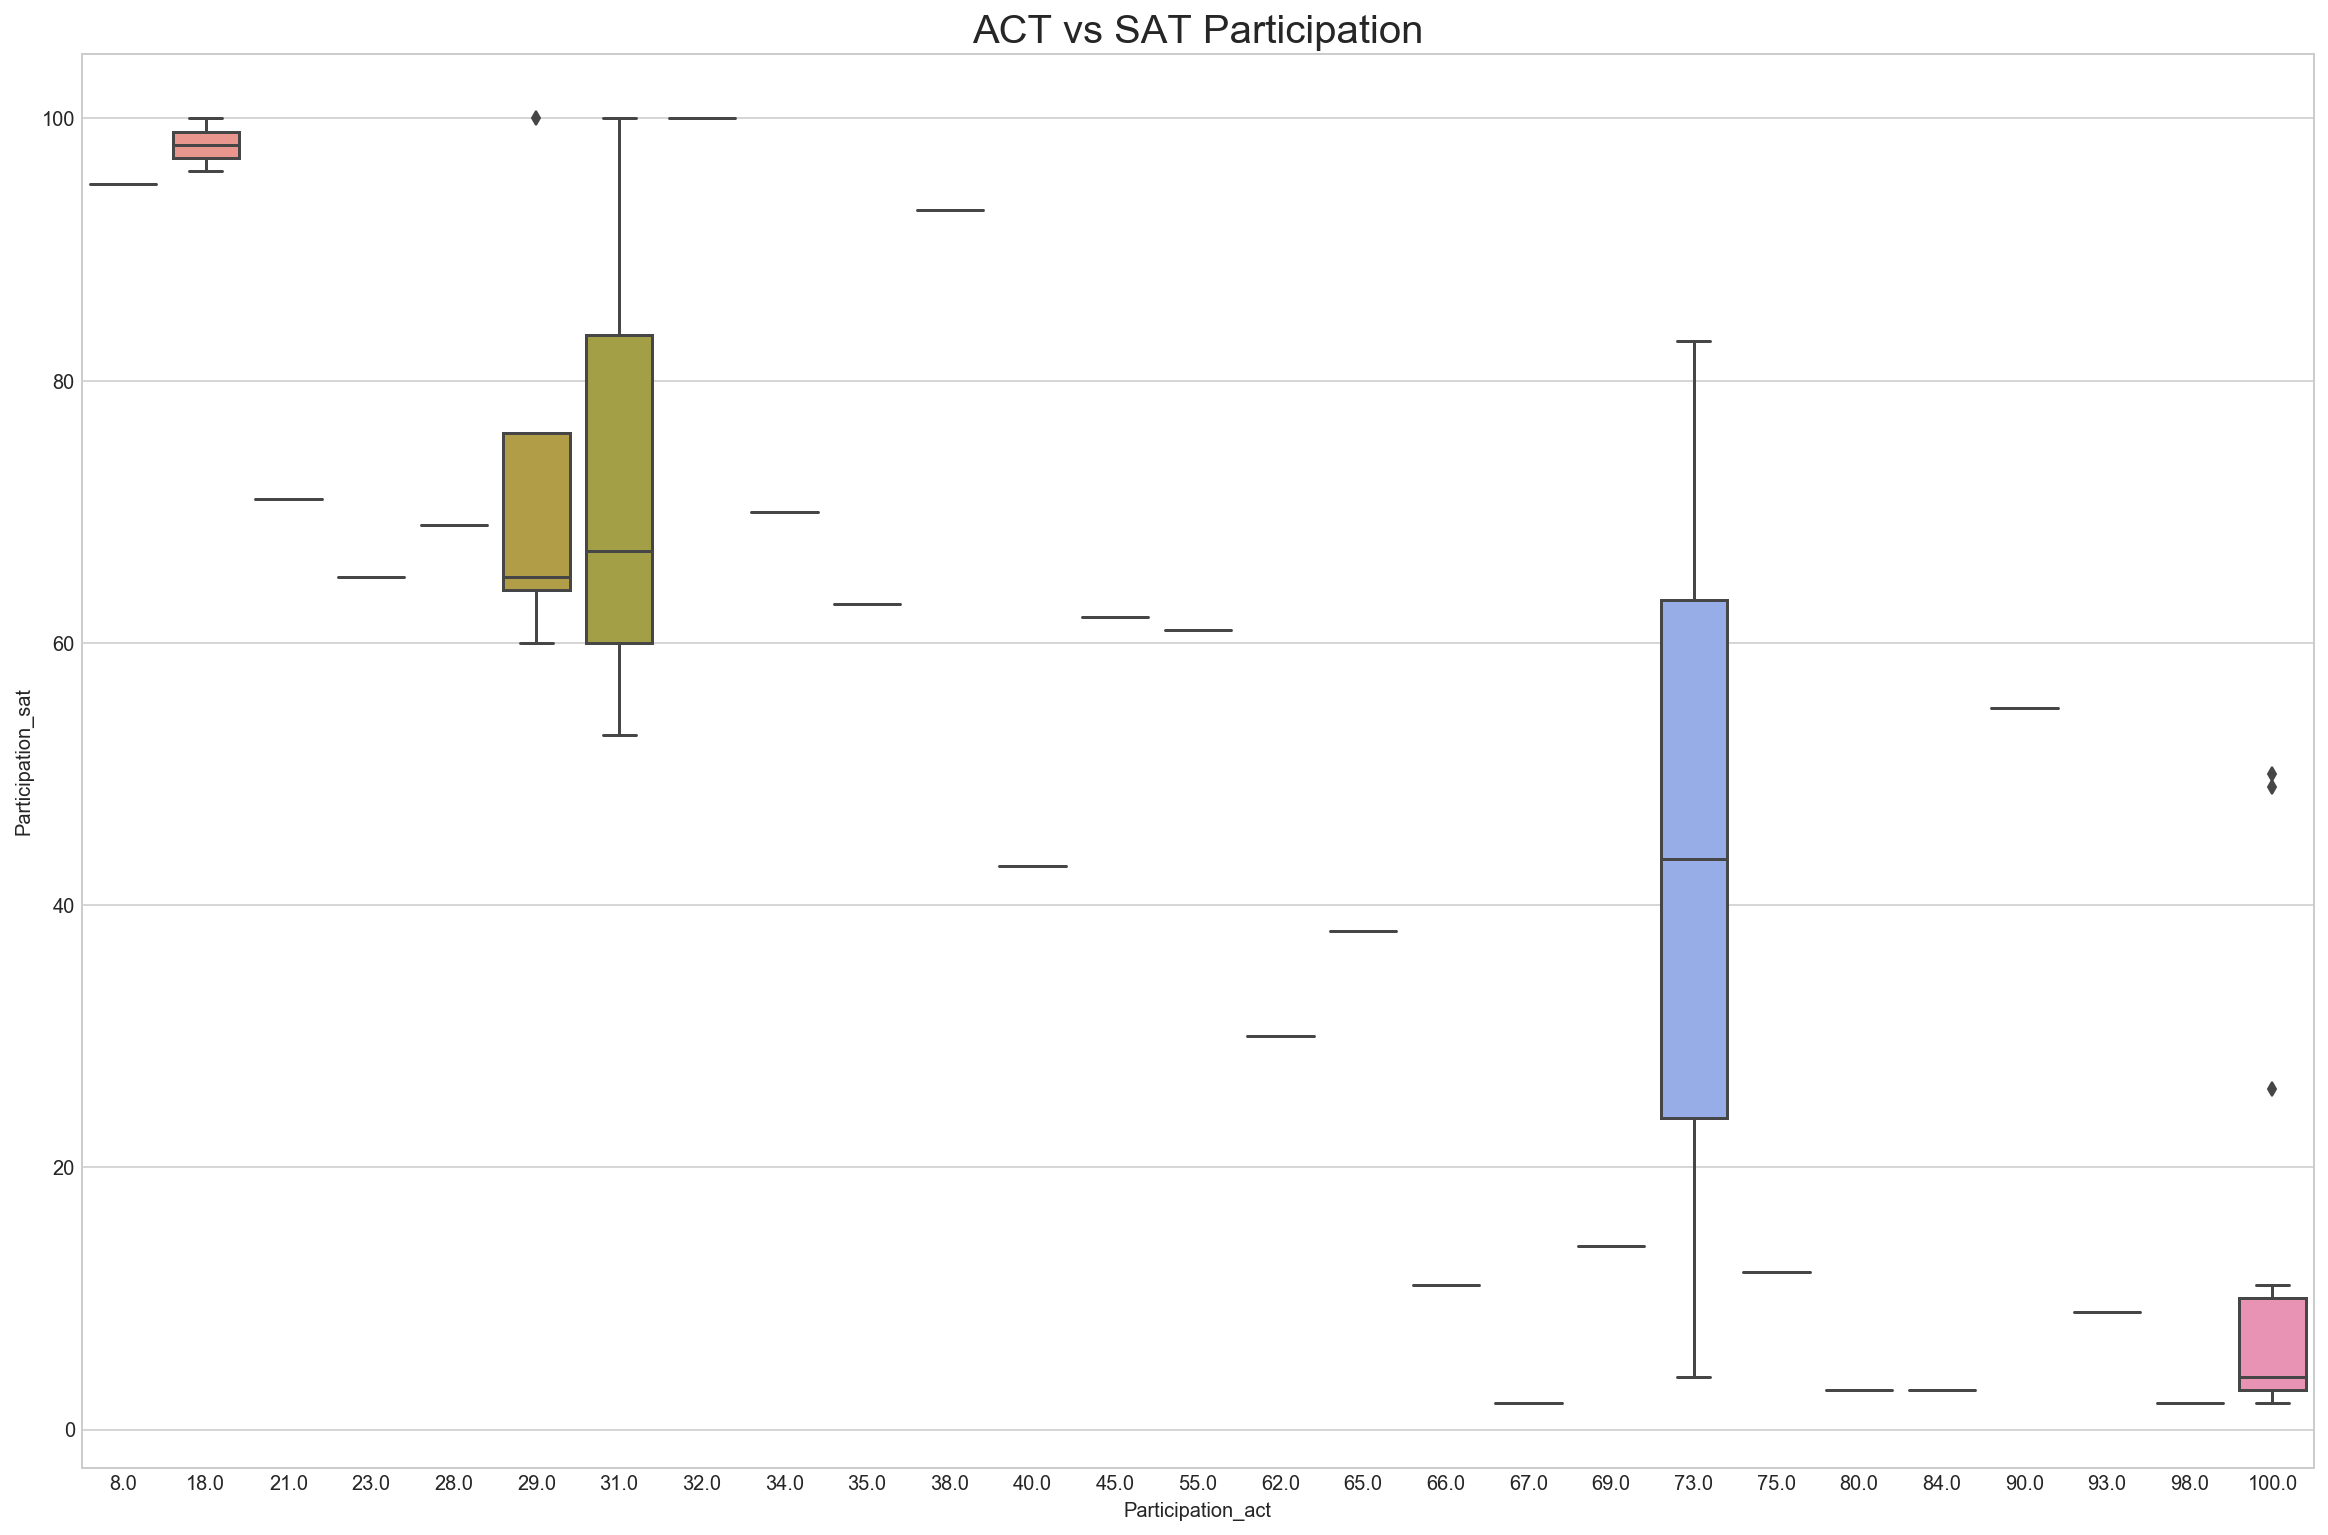

<Figure size 432x288 with 0 Axes>

In [26]:
sns_box_plot(merged_dataframe["Participation_act"],merged_dataframe["Composite"],"ACT Participation vs Composite Score","b")
sns_box_plot(merged_dataframe["Participation_sat"],merged_dataframe["Total"],"SAT Participation vs Total Score","b")
sns_box_plot(merged_dataframe["Participation_act"],merged_dataframe["Participation_sat"],"ACT vs SAT Participation","b")

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

## Step 4: Descriptive and Inferential Statistics

##### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

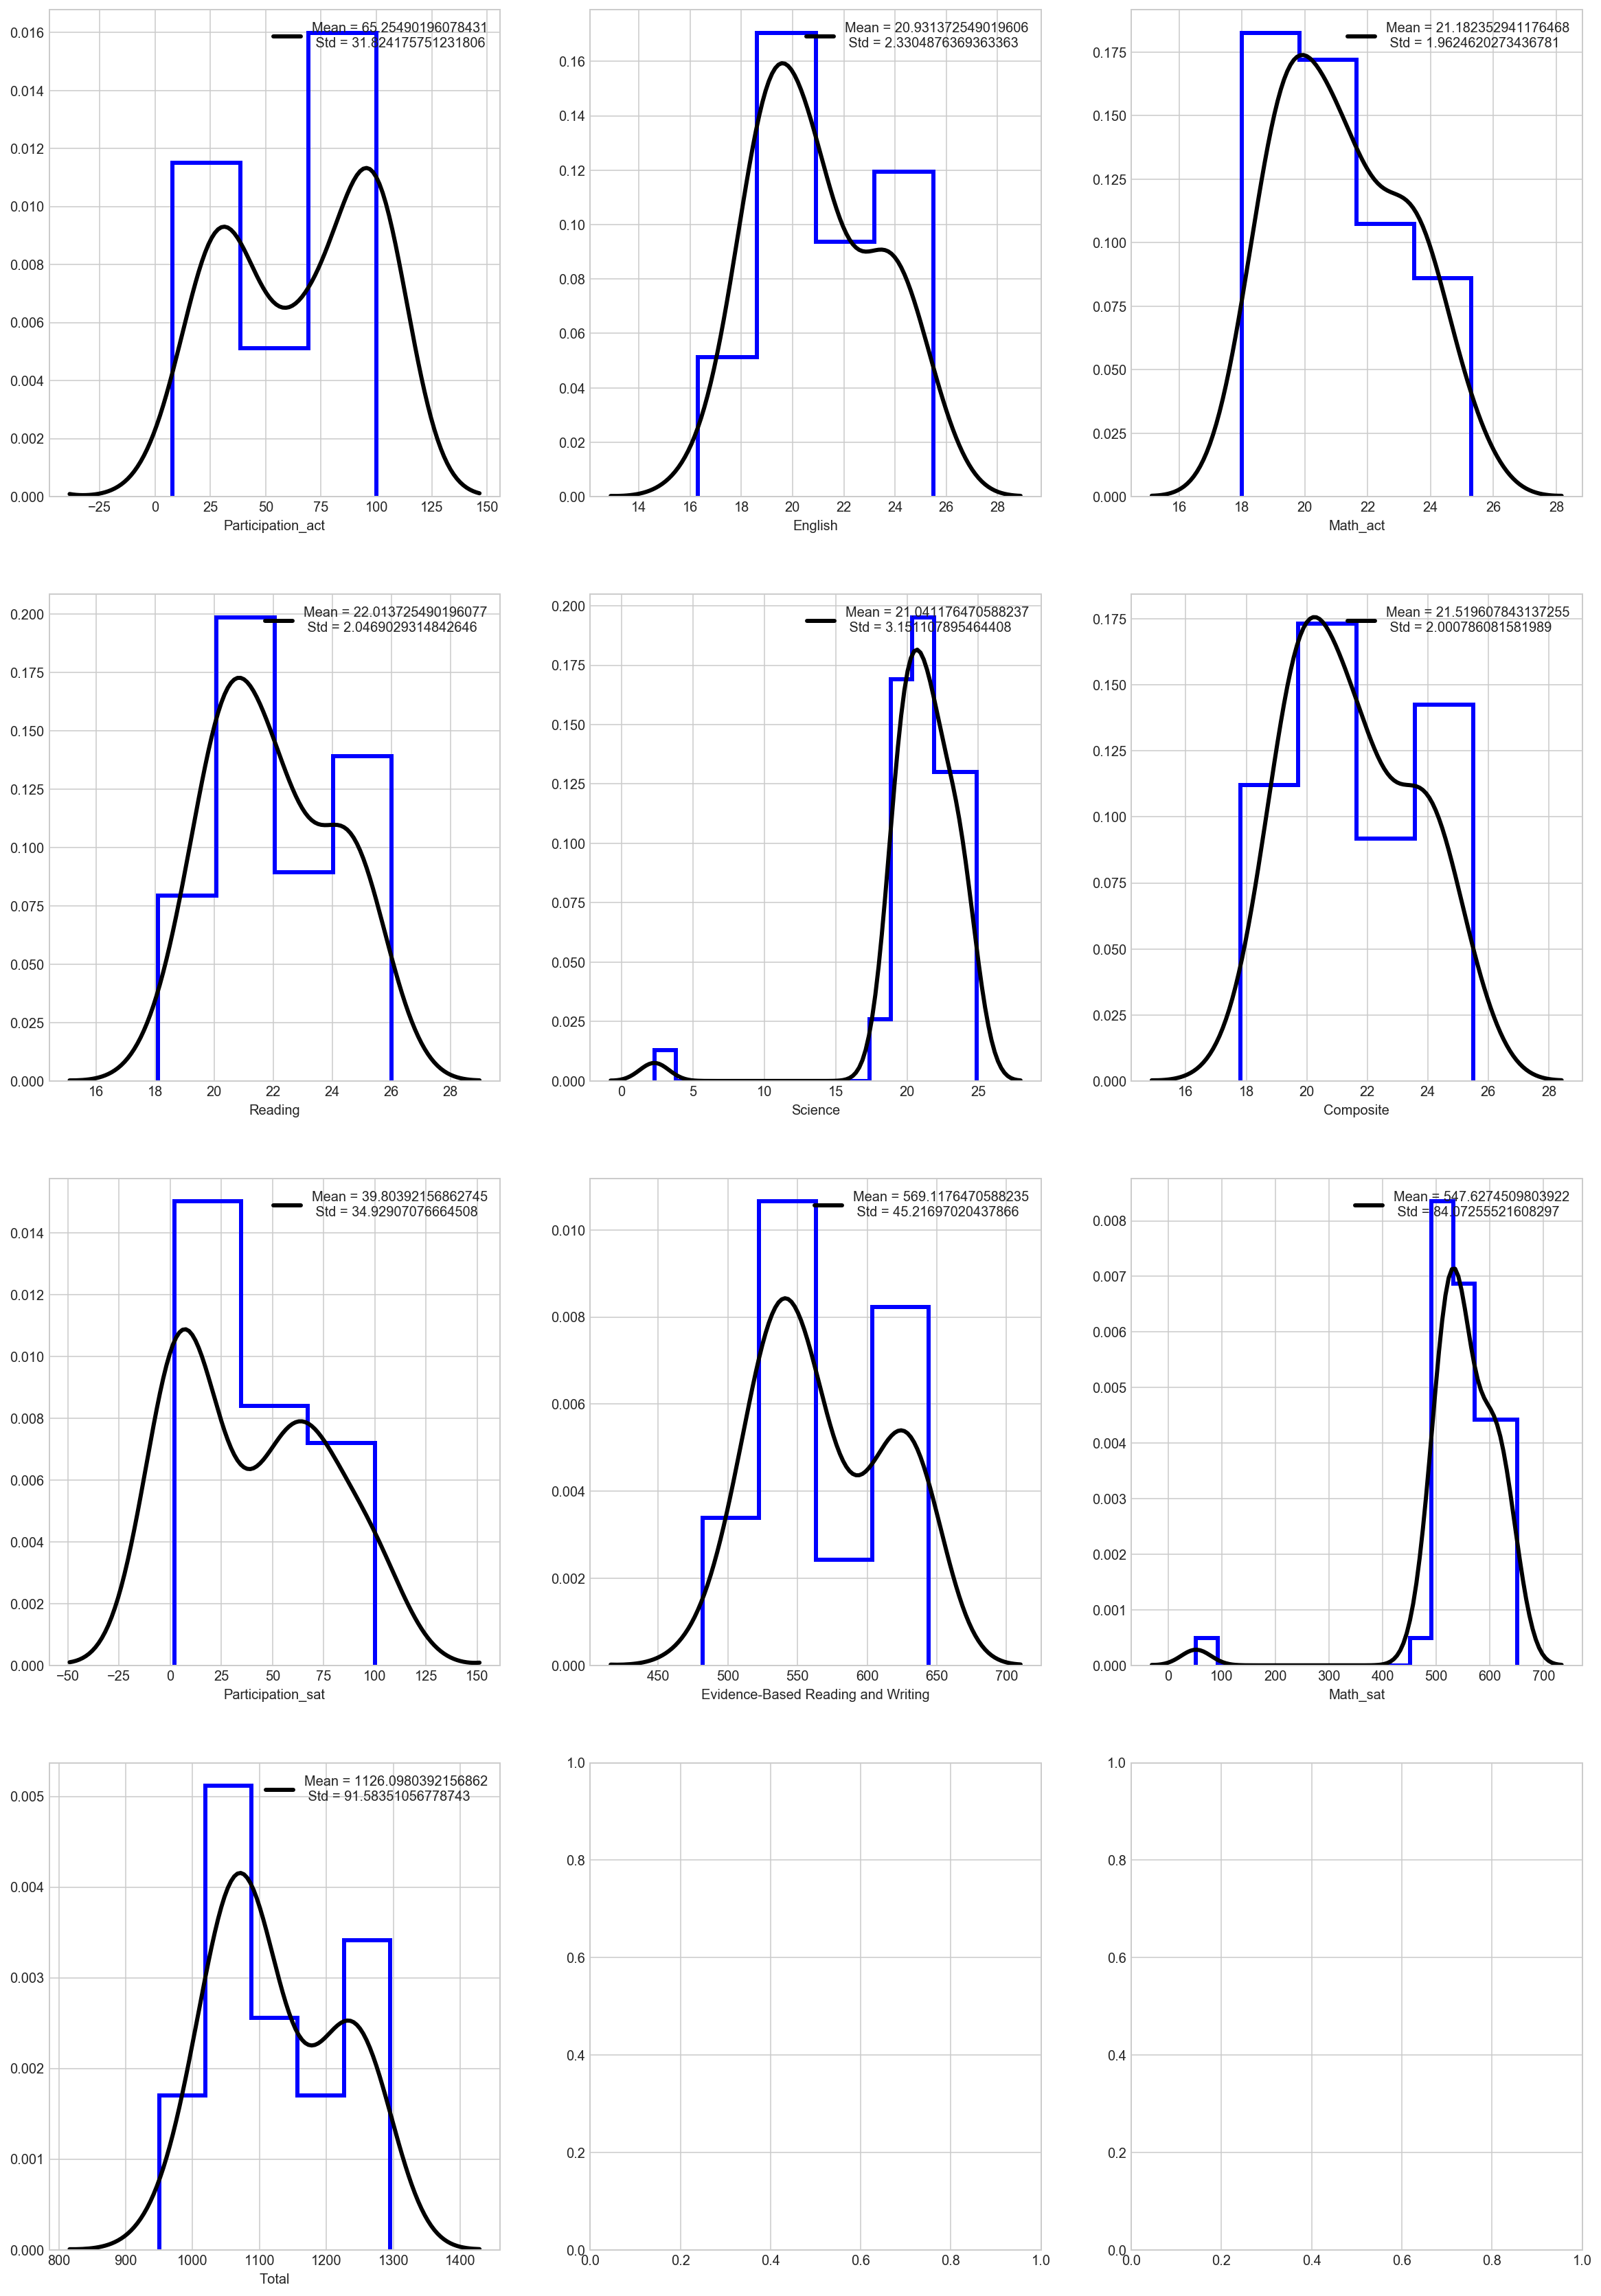

In [27]:
f, axes = plt.subplots(4,3,figsize=(20,30))

for ax, var in zip(axes.flatten(), rearranged_columns[3:]):
    plot_num = 0
    sns.distplot(merged_dataframe[var][:51],
             kde_kws={"color": "k", "lw": 3, "label": "Mean = " + str(np.mean(merged_dataframe[var][:51])) + "\n Std = " + str(np.std(merged_dataframe[var][:51]))},
             hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1, "color": "b"}, ax=ax)
    plot_num = plot_num + 1

##### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

##### 30. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?